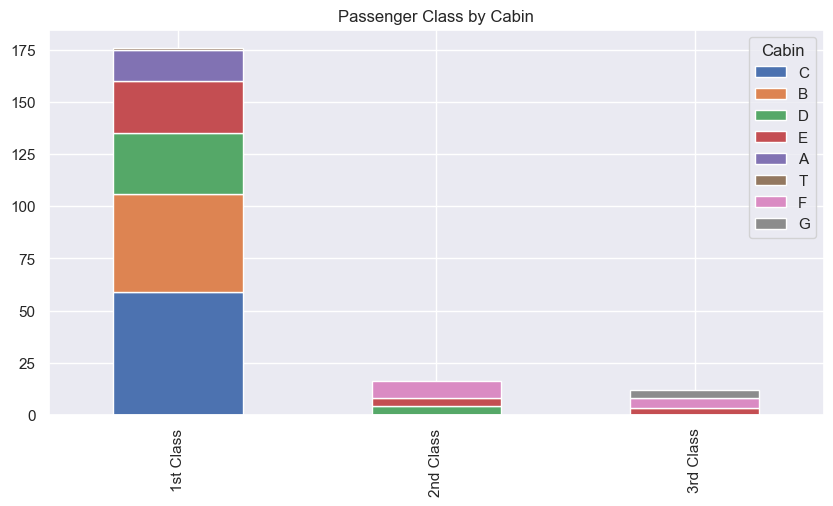

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

test = pd.read_csv('./titanic/test.csv')
train = pd.read_csv('./titanic/train.csv')

def bar_chart (feature, title=''):
    survived = train[train['Survived']==1][feature].value_counts()

    dead = train[train['Survived']==0][feature].value_counts()

    df =pd.DataFrame([survived,dead])

    df.index = ['Survived', 'Dead']

    df.plot(kind='bar', stacked= True, figsize=(10,5))

    plt.title(f'Survival Rate by {title if title else feature}')

    # Save the figure
    output_folder = 'images'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    plt.savefig(f'{output_folder}/{title if title else feature}_survival_bar_chart.png')

train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

# print(train['Title'].value_counts())
# print(test['Title'].value_counts())

title_mapping = {
    "Mr" : '0',
    "Miss" : '1',
    "Mrs" : '2',
    "Master" : '3',
    "Rev" : '3',
    "Col" : '3',
    "Major" : '3',
    "Mlle" : '3',
    "Countess" : '3',
    "Ms" : '3',
    "Lady" : '3',
    "Jonkheer" : '3',
    "Don" : '3',
    "Dona" : '3',
    "Mme" : '3',
    "Capt" : '3',
    "Sir" : '3',
}

for dataset in train_test_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)

# train.head()
# bar_chart('Title')

# delete unnecessary feature from dataset #
train.drop('Name',axis=1, inplace=True)
test.drop('Name',axis=1, inplace=True)


sex_mapping = {
    "male" : '0',
    "female" : '1',
}

for dataset in train_test_data:
    dataset['Sex'] = dataset["Sex"].map(sex_mapping)

# bar_chart('Sex')

# fill missing age with median
train['Age'] = train['Age'].fillna(train.groupby('Title')['Age'].transform('median'))
test['Age'] = test['Age'].fillna(test.groupby('Title')['Age'].transform('median'))

# facet = sns.FacetGrid(train, hue="Survived", aspect=4)
# facet.map(sns.kdeplot, 'Age', fill=True)
# facet.set(xlim=(0, train['Age'].max()))
# facet.add_legend()
# facet.figure.suptitle('Age Distribution by Survival Status (Kernel Density Estimate plot - KDE)')
# plt.savefig('images/Age Distribution by Survival Status (Kernel Density Estimate plot - KDE).png')
# plt.show()

# plt.figure(figsize=(10,6))
# sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', fill=True, bins=30)
# plt.xlim(0, train['Age'].max())
# plt.title('Age Distribution by Survival Status (Stacked Histogram)')
# plt.savefig('images/Age Distribution by Survival Status (Stacked Histogram).png')
# plt.show()

# facet = sns.FacetGrid(train, hue="Survived", aspect=4)
# facet.map(sns.kdeplot, 'Age', fill=True)
# facet.set(xlim=(0, train['Age'].max()))
# facet.add_legend()
# plt.xlim(0,20)
# plt.xlim(20,30)
# plt.xlim(30,40)
# plt.xlim(40,60)


for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4


# bar_chart('Age',"Categorical_Age")

# Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
# Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
# Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

# df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
# df.index = ['1st Class', '2nd Class', '3rd Class']
# df.plot(kind='bar', stacked=True, figsize=(10, 5),title='Passenger Class by Embarkation')
# plt.legend(title="Embarked")
# plt.savefig('images/Passenger_Class_by_Embarkation.png')

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

embarked_mapping = {
    "S" : '0',
    "C" : '1',
    "Q" : '2',
}

for dataset in train_test_data:
    dataset['Embarked'] = dataset["Embarked"].map(embarked_mapping)

train['Fare'] = train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'))
test['Fare'] = test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'))


# facet = sns.FacetGrid(train, hue="Survived", aspect=4)
# facet.map(sns.kdeplot, 'Fare', fill=True)
# facet.set(xlim=(0, train['Fare'].max()))
# facet.add_legend()
# facet.figure.suptitle('Fare Distribution by Survival Status (Kernel Density Estimate plot)', fontsize=14)
# # plt.xlim(0,20)
# plt.savefig('images/Fare_Distribution_by_Survival_Status_KDE.png')
# plt.show()

'''
# this for equal frequency (no need to use this)
for dataset in train_test_data:
    dataset['Fare'] = pd.qcut(dataset['Fare'], 5, labels=False)
'''

for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3

# test.Cabin.value_counts().to_frame()

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

# Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
# Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
# Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
# Pclass1
# df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
# df.index = ['1st Class', '2nd Class', '3rd Class']
# df.plot(kind='bar', stacked=True, figsize=(10, 5),title='Passenger Class by Cabin')
# plt.legend(title="Cabin")
# plt.savefig('images/Passenger_Class_by_Cabin.png')

cabin_mapping = {
    "A" : 0,
    "B" : 0.4,
    "C" : 0.8,
    "D" : 1.2,
    "E" : 1.6,
    "F" : 2.0,
    "G" : 2.4,
    "T" : 2.8,
}

for dataset in train_test_data:
    dataset['Cabin'] = dataset["Cabin"].map(cabin_mapping)